Importing the Dependencies

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

Data collection and processing

In [3]:
# loading the dataset to pandas Dataframe

loan_dataset =pd.read_csv('/content/dataset.csv')

In [4]:
# printing the first five dataset

loan_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# seeing the no of features and data
loan_dataset.shape

(614, 13)

here we have 614 data with 13 features


In [6]:
# statistical mesures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# number of missing values in each colums
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
# dropping all the missing values
loan_dataset=loan_dataset.dropna()

In [9]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [13]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
# label encoding replacing N->0 Y->1 for Loan_status i.e outcome
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

/tmp/ipython-input-474101102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [25]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,Male,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [26]:
# Dependent Column Values

loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [27]:
# replacing the value of  3+ with 4


# loan_dataset.replace({"Dependents":{'3+':4}},inplace=True)
loan_dataset.replace(to_replace='3+',value=4,inplace=True)

In [28]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


Data visualization

<Axes: xlabel='Education', ylabel='count'>

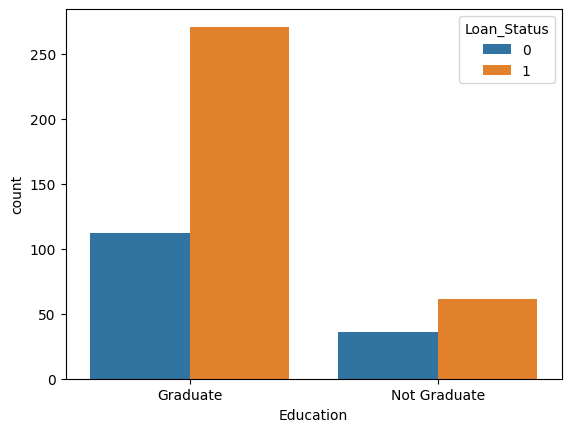

In [20]:
# education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

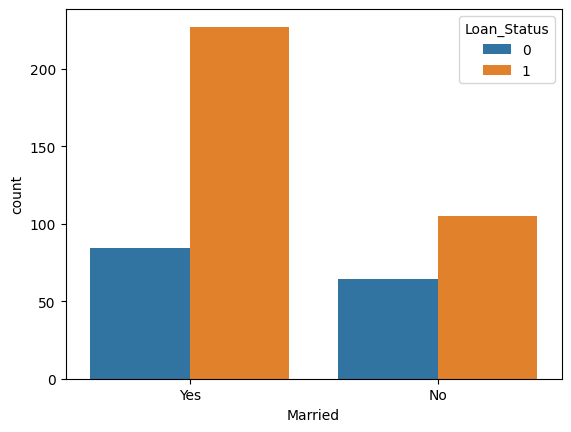

In [21]:
# marital sataus and loan status

sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [30]:
# converting categorical columns with numberical values

loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male': 1, 'Female': 0},'Self_Employed':{'No':0,'Yes':1}
                      ,'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

/tmp/ipython-input-4138362131.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male': 1, 'Female': 0},'Self_Employed':{'No':0,'Yes':1}


In [31]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [33]:
# Seperating the data and label
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1) # we not need loan_id
Y=loan_dataset['Loan_Status']

In [34]:
print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
1         1        1  ...            1.0              0
2         1        1  ...            1.0              2
3         1        1  ...            1.0              2
4         1        0  ...            1.0              2
5         1        1  ...            1.0              2
..      ...      ...  ...            ...            ...
609       0        0  ...            1.0              0
610       1        1  ...            1.0              0
611       1        1  ...            1.0              2
612       1        1  ...            1.0              2
613       0        0  ...            0.0              1

[480 rows x 11 columns]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


spliting training and test data

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [53]:
print(X_test)

     Gender  Married  ... Credit_History  Property_Area
368       1        1  ...            1.0              1
74        1        1  ...            1.0              1
135       1        1  ...            1.0              1
53        1        1  ...            1.0              2
96        0        1  ...            1.0              1
388       1        1  ...            1.0              2
345       1        1  ...            1.0              1
8         1        1  ...            1.0              2
549       1        1  ...            1.0              0
99        1        1  ...            1.0              1
49        0        0  ...            1.0              1
513       1        1  ...            1.0              1
43        1        1  ...            1.0              1
92        1        1  ...            1.0              2
555       1        1  ...            1.0              1
609       0        0  ...            1.0              0
221       1        1  ...            1.0        

Training the model with support vector machine

In [39]:
classifier=svm.SVC(kernel='linear')

In [40]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [42]:
# accuracy score on training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [43]:
print('Accuracy score on training data',training_data_accuracy)

Accuracy score on training data 0.7986111111111112


Confusion Matrix:
 [[ 50  83]
 [  4 295]]


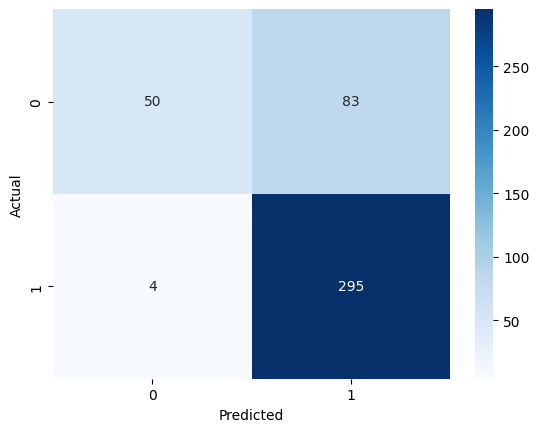

In [50]:
# making confusion matrix
cm = confusion_matrix(Y_train, X_train_prediction)

print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy score on test data

In [46]:
# accuracy score on test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [45]:
print('Accuracy score on training data',test_data_accuracy)

Accuracy score on training data 0.8333333333333334


Confusion Matrix:
 [[ 9  6]
 [ 2 31]]


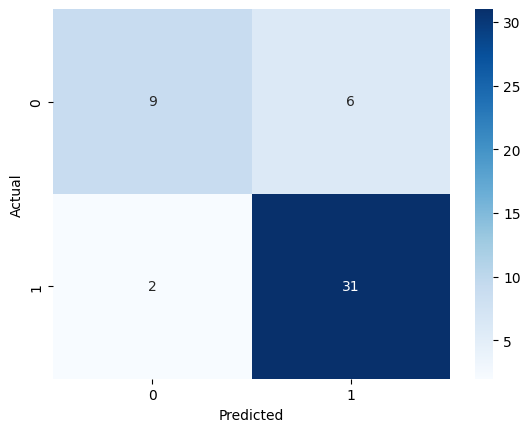

In [51]:
# making confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Making predicting System

Explanation:

iloc[0] → selects the first row from the test set.

.values.reshape(1, -1) → converts it into a 2D array, required by scikit-learn.

result[0] → gets the predicted label from the array.

In [56]:
X_new = X_test.iloc[0].values.reshape(1, -1) # taking random test data to predict
result=classifier.predict(X_new)
print(result)

if result==1:
  print("Loan approved")
else:
  print("Loan disapproved")


[1]
Loan approved


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


That warning occurs because your SVM model was trained on a DataFrame with column names, but when you pass a NumPy array to predict(), scikit-learn notices the feature names are missing.

we can fix warining

In [57]:
# Select the first row
X_new = X_test.iloc[0]   # taking random data to predict

# Convert to DataFrame (keep column names)
X_new = pd.DataFrame([X_new], columns=X_test.columns)

# Make prediction
result = classifier.predict(X_new)
print(result)

if result[0] == 1:
    print("Loan approved")
else:
    print("Loan disapproved")


[1]
Loan approved


we can matched with the data which we take wheather it predicting correct or not   

for test_data first row result is -> 1  
also our model predicion is ->1

making the prediction for new data

In [58]:


# This is the User input we need
gender_input = input("Enter Gender (Male/Female): ")
married_input = input("Married? (Yes/No): ")
education_input = input("Education (Graduate/Not Graduate): ")
self_employed_input = input("Self Employed? (Yes/No): ")
property_area_input = input("Property Area (Rural/Semiurban/Urban): ")

# Convert to numeric as our model is trained on numeric value
gender = 1 if gender_input.lower() == 'male' else 0
married = 1 if married_input.lower() == 'yes' else 0
education = 1 if education_input.lower() == 'graduate' else 0
self_employed = 1 if self_employed_input.lower() == 'yes' else 0
property_area = {'rural':0, 'semiurban':1, 'urban':2}[property_area_input.lower()]

# Numeric inputs
dependents = int(input("Number of Dependents (0-3+): ").replace('3+', '4'))
applicant_income = float(input("Applicant Income: "))
coapplicant_income = float(input("Coapplicant Income: "))
loan_amount = float(input("Loan Amount: "))
loan_amount_term = float(input("Loan Amount Term: "))
credit_history = int(input("Credit History (1=Yes, 0=No): "))

# Prepare DataFrame
X_new = pd.DataFrame([[
    gender, married, dependents, education, self_employed,
    applicant_income, coapplicant_income, loan_amount,
    loan_amount_term, credit_history, property_area
]], columns=X_test.columns)

# Prediction
result = classifier.predict(X_new)
print("Loan Approved ✅" if result[0]==1 else "Loan Disapproved ❌")


Enter Gender (Male/Female): male
Married? (Yes/No): no
Education (Graduate/Not Graduate): graduate
Self Employed? (Yes/No): yes
Property Area (Rural/Semiurban/Urban): rural
Number of Dependents (0-3+): 3
Applicant Income: 100000
Coapplicant Income: 120000
Loan Amount: 500000
Loan Amount Term: 360
Credit History (1=Yes, 0=No): 1
Loan Approved ✅
